# Fritsch Solition Experiments
Author: Joshua D. JOHN
Date: 2024/07/24

These are live Fritsch Soliton experiments run on Oqtant. What I am calling the Fritsch method is a way to create dark solitons at arbitrary position and velocity by simultaneously engineering the amplitude and phase of the condensate wave function. This is introduced as a better approach compared to the technique demonstrated before, which manipulated the condensate phase only.

* Fritsch, A.R., Lu, M., Reid, G., Piñeiro, A., & Spielman, I.B. (2020). _Creating solitons with controllable and near-zero velocity in Bose-Einstein condensates._ Physical review. A, 101 5.

In [1]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory, QuantumMatter
from matplotlib import pyplot as plt
import numpy as np

qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [10]:
qmf.get_client()

Job Limits:
╒═══════════════╤═══════════════════╤════════════════════╤════════════════════╕
│   Daily Limit │   Daily Remaining │   Standard Credits │   Priority Credits │
╞═══════════════╪═══════════════════╪════════════════════╪════════════════════╡
│            20 │                18 │                 98 │                  0 │
╘═══════════════╧═══════════════════╧════════════════════╧════════════════════╛


In [3]:
from FritschSolitonsPkg.FritschSoliton import FritschSolitonMatter

### Hold time Experiments
#### Experiment 1
Range the hold time from 0 to 20 in 2 steps. Phase is fixed at 1.8 $\pi$. Dimpling is fixed at 0.5 kHz. Run 1 time to get a feel of the results then repeat 2 times. Save to Data/HoldTime

In [14]:
repeats = 1
hold_times = np.arange(0,16,2)
hold_time_jobs = []
for ht in hold_times:
    for rep in range(repeats):
        name = "FS_hold_time_" + str(ht) + "_rep_" + str(rep)
        hold_time_jobs.append(FritschSolitonMatter(qmf, 
                                                   soliton_position=-3.0,
                                                   hold_time=float(ht),
                                                   imprinting_phase=1.8,
                                                   matter_name=name
                                                  ).get_matter())

In [15]:
hold_time_jobs[1].lifetime

Decimal('42.0')

In [16]:
sim = False
track = False
if sim == False:
    track = True
[matter.submit(track=track, sim=sim) for matter in hold_time_jobs]

Submitting 1 job(s):

- Job: FS_hold_time_0_rep_0
  Job ID: 782b9456-80a8-49a1-aab5-739bde7359b9

Tracking 1 job(s):

- Job: FS_hold_time_0_rep_0
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: FS_hold_time_2_rep_0
  Job ID: def92af3-4b75-4247-8f8a-0134b3a27662

Tracking 1 job(s):

- Job: FS_hold_time_2_rep_0
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: FS_hold_time_4_rep_0
  Job ID: aac4cc57-3b5c-4d44-94de-e1f37e2197e4

Tracking 1 job(s):

- Job: FS_hold_time_4_rep_0
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: FS_hold_time_6_rep_0
  Job ID: b1f433af-aaf8-4ecf-99e7-3622ba8fb896

Tracking 1 job(s):

- Job: FS_hold_time_6_rep_0
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: FS_hold_time_8_rep_0
  Job ID: 65b4a988-0e84-4649-9279-232589774501

Tracking 1 job(s):

- Job: FS_hold_time_8_rep_0
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: FS_hold_tim

[None, None, None, None, None, None, None, None]

In [17]:
[matter.get_result() for matter in hold_time_jobs]

[None, None, None, None, None, None, None, None]

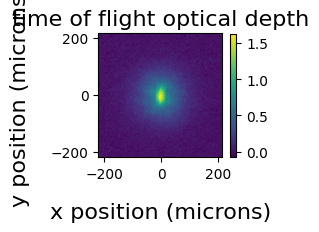

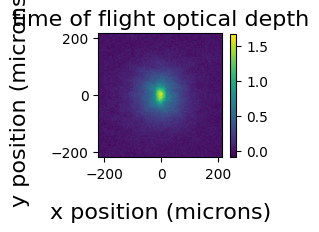

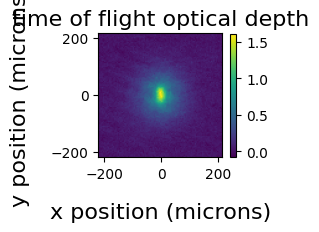

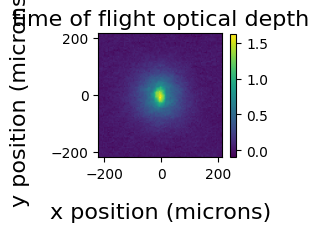

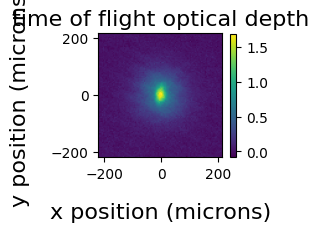

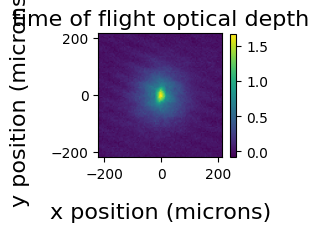

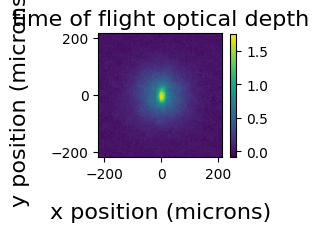

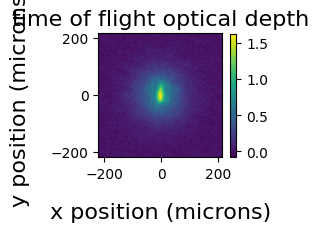

In [18]:
for matter in hold_time_jobs:
    matter.output.plot_tof(figsize=(2, 2))

In [19]:
import os
home = os.path.expanduser("~")
for matter in hold_time_jobs:
    data_path = f"{home}\Projects\BEConOqtant\Solitons\FritschSolitons\Data\HoldTime\\{matter.name}.txt"
    matter.write_to_file(file_path=data_path)

Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\HoldTime\FS_hold_time_0_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\HoldTime\FS_hold_time_2_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\HoldTime\FS_hold_time_4_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\HoldTime\FS_hold_time_6_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\HoldTime\FS_hold_time_8_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\HoldTime\FS_hold_time_10_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\HoldTime\FS_hold_time_12_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\HoldTime\FS_hold_time_14_rep_0.txt"


### Dark Soliton (old approach)

In [21]:
repeats = 1
hold_times = np.arange(0,14,2)
hold_time_jobs = []
for ht in hold_times:
    for rep in range(repeats):
        name = "DS_hold_time_" + str(ht) + "_rep_" + str(rep)
        hold_time_jobs.append(FritschSolitonMatter(qmf, 
                                                   soliton_position=0.0,
                                                   dimpling_potential=0.0,
                                                   hold_time=float(ht),
                                                   imprinting_phase=1.8,
                                                   matter_name=name
                                                  ).get_matter())

In [22]:
sim = False
track = False
if sim == False:
    track = True
[matter.submit(track=track, sim=sim) for matter in hold_time_jobs]

Submitting 1 job(s):

- Job: DS_hold_time_0_rep_0
  Job ID: f4620dd4-6bc6-4de5-8865-ea23d74e2c22

Tracking 1 job(s):

- Job: DS_hold_time_0_rep_0
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: DS_hold_time_2_rep_0
  Job ID: 0bff827d-f162-4124-b6e0-c993f5a37c06

Tracking 1 job(s):

- Job: DS_hold_time_2_rep_0
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: DS_hold_time_4_rep_0
  Job ID: 558cd48b-f8e9-4756-879c-ede85e528d5b

Tracking 1 job(s):

- Job: DS_hold_time_4_rep_0
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: DS_hold_time_6_rep_0
  Job ID: 8db81bb4-7697-447a-b84a-57be185c1f1f

Tracking 1 job(s):

- Job: DS_hold_time_6_rep_0
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: DS_hold_time_8_rep_0
  Job ID: 616beaae-017a-4a6d-bf1a-c8c4aa127fe6

Tracking 1 job(s):

- Job: DS_hold_time_8_rep_0
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: DS_hold_tim

[None, None, None, None, None, None, None]

In [23]:
[matter.get_result() for matter in hold_time_jobs]

[None, None, None, None, None, None, None]

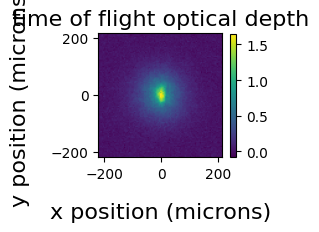

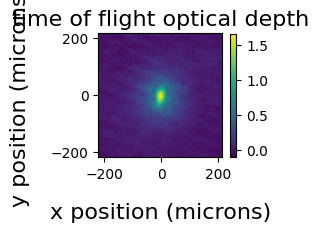

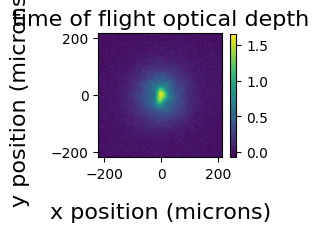

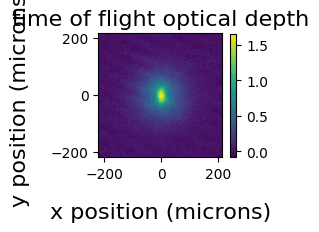

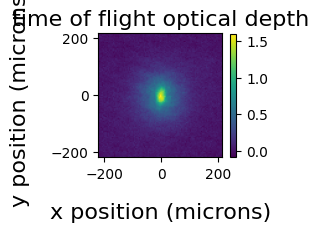

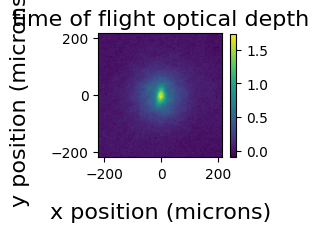

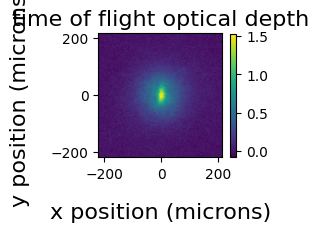

In [24]:
for matter in hold_time_jobs:
    matter.output.plot_tof(figsize=(2, 2))

In [25]:
import os
home = os.path.expanduser("~")
for matter in hold_time_jobs:
    data_path = f"{home}\Projects\BEConOqtant\Solitons\FritschSolitons\Data\Dark\\{matter.name}.txt"
    matter.write_to_file(file_path=data_path)

Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\Dark\DS_hold_time_0_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\Dark\DS_hold_time_2_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\Dark\DS_hold_time_4_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\Dark\DS_hold_time_6_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\Dark\DS_hold_time_8_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\Dark\DS_hold_time_10_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\Dark\DS_hold_time_12_rep_0.txt"


### Background

In [26]:
repeats = 3
hold_times = np.arange(0,1,1)
hold_time_jobs = []
for ht in hold_times:
    for rep in range(repeats):
        name = "Background_" + str(ht) + "_rep_" + str(rep)
        hold_time_jobs.append(FritschSolitonMatter(qmf, 
                                                   soliton_position=0.0,
                                                   dimpling_potential=0.0,
                                                   hold_time=0.0,
                                                   imprinting_phase=0.0,
                                                   matter_name=name
                                                  ).get_matter())

In [27]:
sim = False
track = False
if sim == False:
    track = True
[matter.submit(track=track, sim=sim) for matter in hold_time_jobs]

Submitting 1 job(s):

- Job: Background_0_rep_0
  Job ID: ba5f9377-761a-45c9-9094-fde2742582c2

Tracking 1 job(s):

- Job: Background_0_rep_0
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: Background_0_rep_1
  Job ID: 733241e1-078c-40e4-af6e-38ba65db4068

Tracking 1 job(s):

- Job: Background_0_rep_1
  - RUNNING
  - COMPLETE

All job(s) complete
Submitting 1 job(s):

- Job: Background_0_rep_2
  Job ID: 3956c0eb-55e7-4bf5-a839-55a651ff97fa

Tracking 1 job(s):

- Job: Background_0_rep_2
  - RUNNING
  - COMPLETE

All job(s) complete


[None, None, None]

In [28]:
[matter.get_result() for matter in hold_time_jobs]

[None, None, None]

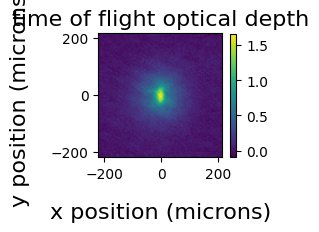

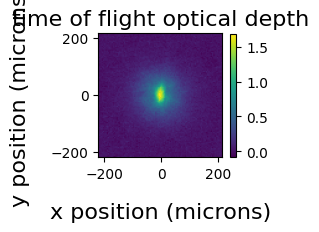

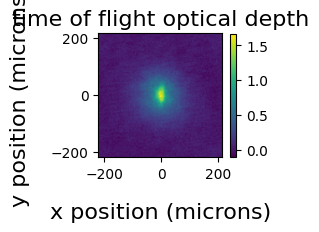

In [29]:
for matter in hold_time_jobs:
    matter.output.plot_tof(figsize=(2, 2))

In [30]:
import os
home = os.path.expanduser("~")
for matter in hold_time_jobs:
    data_path = f"{home}\Projects\BEConOqtant\Solitons\FritschSolitons\Data\Background\\{matter.name}.txt"
    matter.write_to_file(file_path=data_path)

Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\Background\Background_0_rep_0.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\Background\Background_0_rep_1.txt"
Wrote file: "C:\Users\Josh\Projects\BEConOqtant\Solitons\FritschSolitons\Data\Background\Background_0_rep_2.txt"
